In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [23]:
def get_landmarks(path):
    numbers = None
    with open(path) as f:
        numbers = np.array(list(map(lambda x: list(map(float, x.strip('()\n').split(','))), f.readlines()))).flatten()
    return numbers

In [48]:
# Check if a point is inside a rectangle
def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True

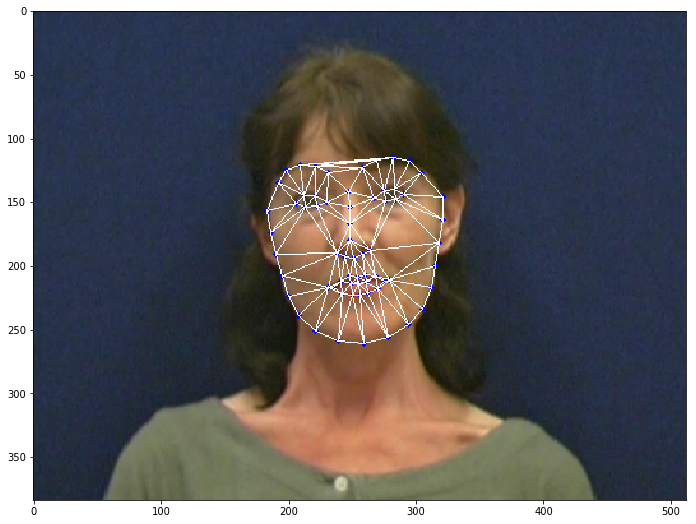

In [58]:
raw_data = get_landmarks('data/sa1/001_sol')
points = []
for i in range(len(raw_data)//2):
    points.append((int(raw_data[2*i]), int(raw_data[2*i+1])))

img = cv2.imread('data/sa1/001')

rect = (0, 0, img.shape[1], img.shape[0])
subdiv  = cv2.Subdiv2D(rect)
for p in points :
    cv2.circle(img, p, 2, (255,0,0), -1)
    subdiv.insert(p)
    
for t in subdiv.getTriangleList():
    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])
    
    if rect_contains(rect, pt1) and rect_contains(rect, pt2) and rect_contains(rect, pt3):
        cv2.line(img, pt1, pt2, (255, 255, 255))
        cv2.line(img, pt2, pt3, (255, 255, 255))
        cv2.line(img, pt3, pt1, (255, 255, 255))
    
plt.figure(figsize=(12, 9))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()